<a href="https://colab.research.google.com/github/TMhdSofyan/Unsupervised_Learning/blob/main/Logging_FZI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
! pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.5 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32195 sha256=5ec23ef2e4f6aa7f8e6f49c1be36503d39ae13078344dc65be0c687b4cb248b9
  Stored in directory: /root/.cache/pip/wheels/ea/b3/7d/0a33c9f0e642e714df1e619df91370950750a14afea5705565
Successfully built jcopml


In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [8]:
df = pd.read_csv('/content/drive/MyDrive/01_Project_Reservoir_Description/Data/Logging_FZI.csv')
df.head()

,UWI,FM_TOP,DEPTH,GR,SP,CALX,RHOB,DPSS,NPSS,ILD,ILM,SFL,DT,FZI_CALC
0,102081000505W400,LMNV,1112.1,46.32,-39.50,212.37,2378.71,0.17,0.31,4.24,4.24,5.89,NaN,2.21
1,102081000505W400,LMNV,1112.2,46.90,-42.00,212.85,2378.71,0.17,0.31,4.61,4.65,6.44,NaN,0.64
2,102081000505W400,LMNV,1112.6,55.67,-48.60,210.07,2405.00,0.14,0.36,6.26,6.38,7.16,NaN,4.04
3,102081000505W400,LMNV,1112.7,56.26,-50.40,206.31,2425.50,0.14,0.35,6.59,6.84,7.20,NaN,0.50
4,102081000505W400,SBRS,1115.2,56.96,-67.49,204.46,2312.50,0.23,0.25,14.71,19.37,19.28,NaN,3.24


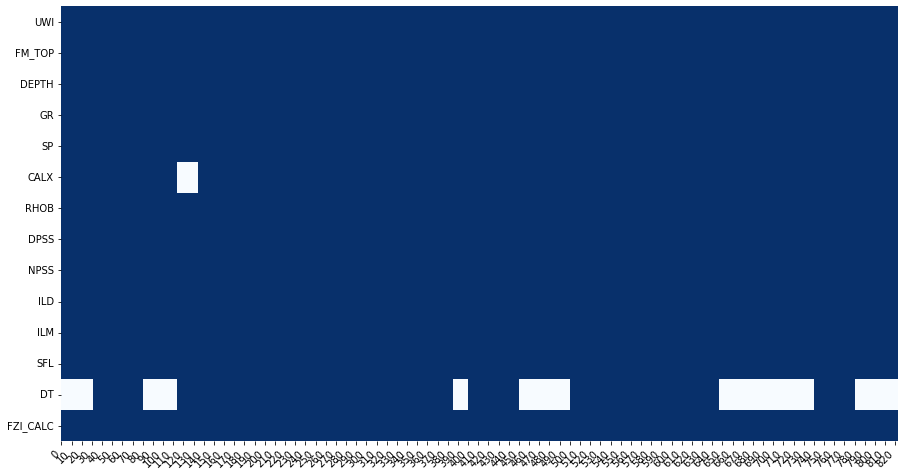

In [9]:
plot_missing_value(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UWI       823 non-null    object 
 1   FM_TOP    823 non-null    object 
 2   DEPTH     823 non-null    float64
 3   GR        823 non-null    float64
 4   SP        823 non-null    float64
 5   CALX      802 non-null    float64
 6   RHOB      823 non-null    float64
 7   DPSS      823 non-null    float64
 8   NPSS      823 non-null    float64
 9   ILD       823 non-null    float64
 10  ILM       823 non-null    float64
 11  SFL       823 non-null    float64
 12  DT        558 non-null    float64
 13  FZI_CALC  823 non-null    float64
dtypes: float64(12), object(2)
memory usage: 90.1+ KB


In [11]:
# replace missing values with median
df['CALX'] = df['CALX'].fillna(df['CALX'].median())

# delete column with too many missing values 
df = df.drop(columns = ['DT'])

# delete not necessary to the analysis.  Others will follow further analysis
df = df.drop(columns = ['UWI', 'DEPTH'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FM_TOP    823 non-null    object 
 1   GR        823 non-null    float64
 2   SP        823 non-null    float64
 3   CALX      823 non-null    float64
 4   RHOB      823 non-null    float64
 5   DPSS      823 non-null    float64
 6   NPSS      823 non-null    float64
 7   ILD       823 non-null    float64
 8   ILM       823 non-null    float64
 9   SFL       823 non-null    float64
 10  FZI_CALC  823 non-null    float64
dtypes: float64(10), object(1)
memory usage: 70.9+ KB


In [14]:
df = df.drop(columns = ['FM_TOP'])

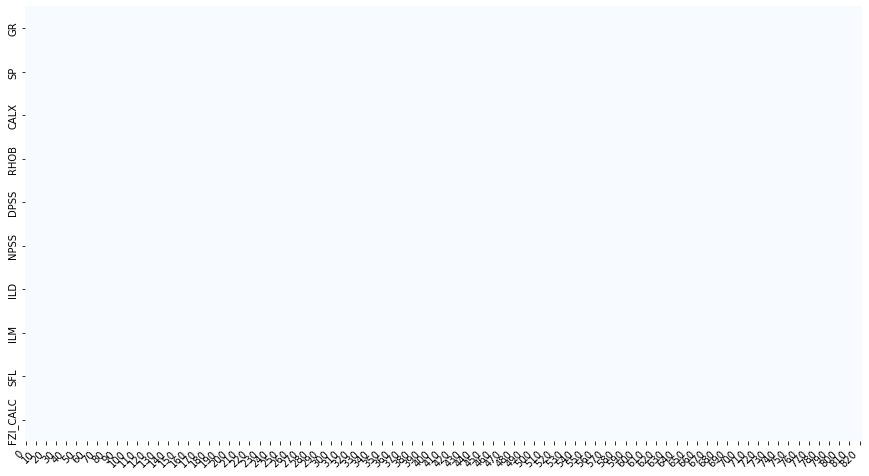

In [15]:
plot_missing_value(df)

In [16]:
df.head()

,GR,SP,CALX,RHOB,DPSS,NPSS,ILD,ILM,SFL,FZI_CALC
0,46.32,-39.50,212.37,2378.71,0.17,0.31,4.24,4.24,5.89,2.21
1,46.90,-42.00,212.85,2378.71,0.17,0.31,4.61,4.65,6.44,0.64
2,55.67,-48.60,210.07,2405.00,0.14,0.36,6.26,6.38,7.16,4.04
3,56.26,-50.40,206.31,2425.50,0.14,0.35,6.59,6.84,7.20,0.50
4,56.96,-67.49,204.46,2312.50,0.23,0.25,14.71,19.37,19.28,3.24


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GR,823.0,56.478676,21.141645,16.65,42.455,53.470,66.700,175.62
SP,823.0,-36.158117,40.049282,-108.42,-63.160,-44.950,-19.700,82.70
CALX,823.0,203.785899,12.642993,184.75,195.495,200.465,208.240,296.55
RHOB,823.0,2357.049295,79.898105,1958.70,2305.115,2359.520,2405.970,2959.80
DPSS,823.0,0.177776,0.048824,-0.23,0.150,0.180,0.210,0.42
NPSS,823.0,0.284192,0.046944,0.09,0.260,0.280,0.310,0.53
ILD,823.0,17.877412,12.761298,1.39,12.025,15.270,19.460,107.21
ILM,823.0,18.812916,15.992650,1.53,12.145,15.710,19.820,167.79
SFL,823.0,24.252770,30.484999,1.82,12.930,17.570,23.805,420.99
FZI_CALC,823.0,2.059417,1.893674,0.09,0.760,1.540,2.620,13.69


array([[<AxesSubplot:title={'center':'GR'}>,
        <AxesSubplot:title={'center':'SP'}>,
        <AxesSubplot:title={'center':'CALX'}>],
       [<AxesSubplot:title={'center':'RHOB'}>,
        <AxesSubplot:title={'center':'DPSS'}>,
        <AxesSubplot:title={'center':'NPSS'}>],
       [<AxesSubplot:title={'center':'ILD'}>,
        <AxesSubplot:title={'center':'ILM'}>,
        <AxesSubplot:title={'center':'SFL'}>],
       [<AxesSubplot:title={'center':'FZI_CALC'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

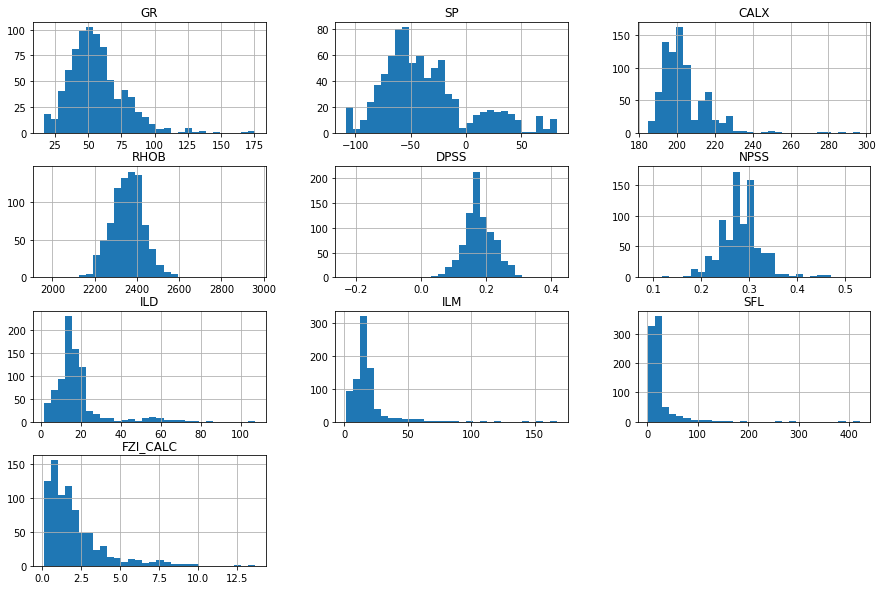

In [20]:
# more detailed look at the Univariate plots
df.hist(bins=30, figsize=(15,10))

In [29]:
# delete columns that correlate too closely  - "colinearity"
df = df.drop(columns = ['ILM', 'SFL'])

In [34]:
df = df.drop(columns = ['DPSS'])

<AxesSubplot:>

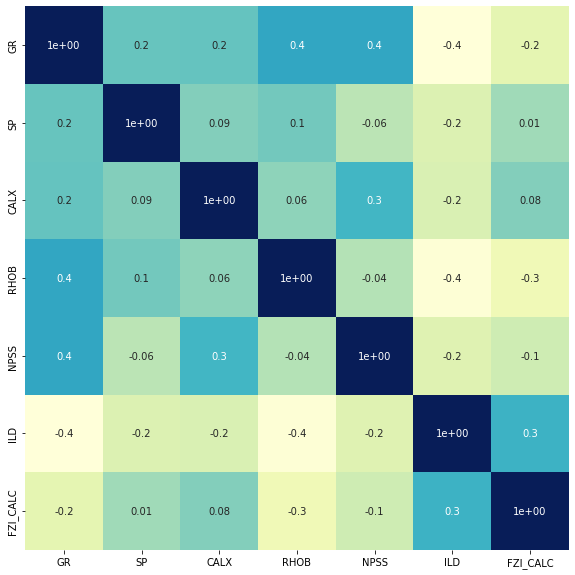

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap= "YlGnBu", cbar= False, annot= True, square= True, fmt= '.1')


In [36]:
X = df.drop(columns="FZI_CALC")
y = df.FZI_CALC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((658, 6), (165, 6), (658,), (165,))

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gs
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax', transform= 'yeo-johnson', poly = 2), X.columns )])


from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model_RF = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50,  n_jobs=-1, verbose=1, random_state=42)
model_RF.fit(X_train, y_train)

print(model_RF.best_params_)
print(model_RF.score(X_train, y_train), model_RF.best_score_, model_RF.score(X_test, y_test))

/usr/local/lib/python3.8/dist-packages/jcopml/pipeline/_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 69, 'algo__max_features': 0.6962700559185838, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 105}
0.8145176985295045 0.19597494797063117 0.3647117365448168


In [40]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual

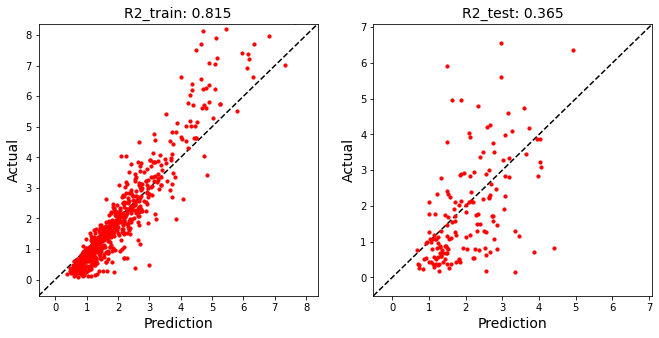

In [41]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_RF)

In [ ]:
X = df.drop(columns="FZI_CALC")
y = df.FZI_CALC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape